In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

cacao = pd.read_csv('cacao_flavors.csv', na_values=u'\xa0')

In [2]:
cacao.head()

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,NaN,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,NaN,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,NaN,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,NaN,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,NaN,Peru


In [3]:
import re

fixed_column_names = [re.sub(r'\s+', ' ', n, flags=re.UNICODE) for n in list(cacao.columns)]
cacao.columns = fixed_column_names
cacao.head()

,Bar id,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,NaN,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,NaN,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,NaN,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,NaN,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,NaN,Peru


In [4]:
cacao.describe()

,Bar id,REF,Review Date,Rating
count,1795.000000,1795.000000,1795.000000,1795.000000
mean,898.000000,1035.904735,2012.325348,3.422981
std,518.316184,552.886365,2.927210,1.750584
min,1.000000,5.000000,2006.000000,1.000000
25%,449.500000,576.000000,2010.000000,3.000000
50%,898.000000,1069.000000,2013.000000,3.250000
75%,1346.500000,1502.000000,2015.000000,3.500000
max,1795.000000,1952.000000,2017.000000,19.750000


In [5]:
# Задание 2.2.1
# Задание 2.2.2

cacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bar id                            1795 non-null   int64  
 1   Company (Maker-if known)          1696 non-null   object 
 2   Specific Bean Origin or Bar Name  1737 non-null   object 
 3   REF                               1795 non-null   int64  
 4   Review Date                       1795 non-null   int64  
 5   Cocoa Percent                     1795 non-null   object 
 6   Company Location                  1795 non-null   object 
 7   Rating                            1795 non-null   float64
 8   Bean Type                         907 non-null    object 
 9   Broad Bean Origin                 1721 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


In [6]:
cacao

,Bar id,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,NaN,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,NaN,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,NaN,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,NaN,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,NaN,Peru
...,...,...,...,...,...,...,...,...,...,...
1790,1791,Zotter,Peru,647,2011,70%,Austria,3.75,NaN,Peru
1791,1792,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,1793,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,1794,Zotter,Kerala State,781,2011,62%,Austria,3.25,NaN,India


1795


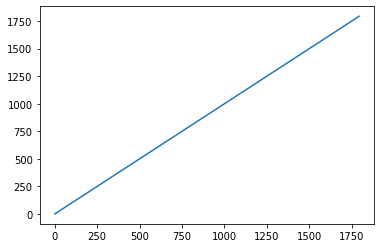

In [7]:
print(cacao['Bar id'].nunique())
plt.plot(cacao.index)

In [8]:
# вы 'Bar id' как индекс
cacao = cacao.set_index('Bar id')

In [9]:
# Задание 2.3.1 
print(cacao['Company (Maker-if known)'].nunique())

407


In [10]:
# Задание 2.3.2
print(cacao['Specific Bean Origin or Bar Name'].nunique())

1012


In [11]:
# Задание 2.3.3
(cacao['Specific Bean Origin or Bar Name'].value_counts() > 10).value_counts()
# количество 'True' значений

False    997
True      15
Name: Specific Bean Origin or Bar Name, dtype: int64

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: REF, dtype: float64

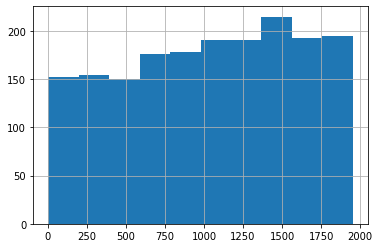

In [12]:
cacao['REF'].hist()
cacao['REF'].describe()

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: Review Date, dtype: float64

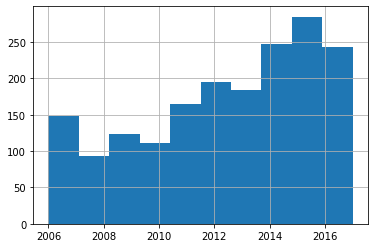

In [13]:
cacao['Review Date'].hist()
cacao['Review Date'].describe()

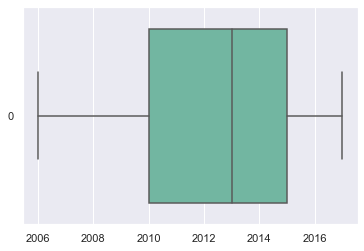

In [14]:
# Задание 2.3.4 
sns.set()
sns.boxplot(data=cacao['Review Date'].values, orient="h", palette="Set2")
# нет выбросов

In [15]:
cacao['Cocoa Percent'] = cacao['Cocoa Percent'].apply(lambda x: float(x.replace('%', '')))
cacao

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
Bar id,,,,,,,,,
1,A. Morin,Agua Grande,1876,2016,63.0,France,11.50,NaN,Sao Tome
2,A. Morin,Kpime,1676,2015,70.0,France,2.75,NaN,Togo
3,A. Morin,Atsane,1676,2015,670.0,France,3.00,NaN,Togo
4,A. Morin,Akata,1680,2015,70.0,France,3.50,NaN,Togo
5,A. Morin,Quilla,1704,2015,70.0,France,3.50,NaN,Peru
...,...,...,...,...,...,...,...,...,...
1791,Zotter,Peru,647,2011,70.0,Austria,3.75,NaN,Peru
1792,Zotter,Congo,749,2011,65.0,Austria,3.00,Forastero,Congo
1793,Zotter,Kerala State,749,2011,65.0,Austria,3.50,Forastero,India


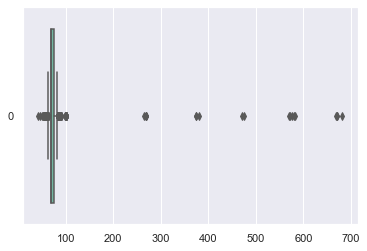

In [16]:
cacao['Cocoa Percent'].describe()

sns.set()
sns.boxplot(data=cacao['Cocoa Percent'].values, orient="h", palette="Set2")

In [17]:
cacao = cacao[cacao['Cocoa Percent'] <= 100.0]
cacao

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
Bar id,,,,,,,,,
1,A. Morin,Agua Grande,1876,2016,63.0,France,11.50,NaN,Sao Tome
2,A. Morin,Kpime,1676,2015,70.0,France,2.75,NaN,Togo
4,A. Morin,Akata,1680,2015,70.0,France,3.50,NaN,Togo
5,A. Morin,Quilla,1704,2015,70.0,France,3.50,NaN,Peru
6,A. Morin,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela
...,...,...,...,...,...,...,...,...,...
1791,Zotter,Peru,647,2011,70.0,Austria,3.75,NaN,Peru
1792,Zotter,Congo,749,2011,65.0,Austria,3.00,Forastero,Congo
1793,Zotter,Kerala State,749,2011,65.0,Austria,3.50,Forastero,India


In [18]:
cacao['Company Location'].value_counts()

U.S.A.         756
France         155
Canada         124
U.K.            94
Italy           63
              ... 
Eucador          1
Russia           1
Suriname         1
Philippines      1
Martinique       1
Name: Company Location, Length: 60, dtype: int64

In [19]:
cacao['Company Location'].describe()

count       1776
unique        60
top       U.S.A.
freq         756
Name: Company Location, dtype: object

count    1776.000000
mean        3.425816
std         1.759007
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max        19.750000
Name: Rating, dtype: float64

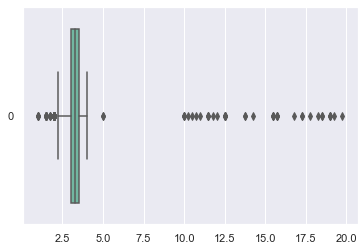

In [20]:
sns.boxplot(data=cacao['Rating'].values, orient="h", palette="Set2")
cacao['Rating'].describe()

In [21]:
perc25 = cacao['Rating'].quantile(0.25)
perc75 = cacao['Rating'].quantile(0.75)
IQR = perc75 - perc25

low = perc25 - 1.5*IQR
high = perc75 + 1.5*IQR

cacao = cacao[cacao['Rating'].between(low,high)]
cacao

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
Bar id,,,,,,,,,
2,A. Morin,Kpime,1676,2015,70.0,France,2.75,NaN,Togo
4,A. Morin,Akata,1680,2015,70.0,France,3.50,NaN,Togo
5,A. Morin,Quilla,1704,2015,70.0,France,3.50,NaN,Peru
6,A. Morin,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela
7,A. Morin,Cuba,1315,2014,70.0,France,3.50,NaN,Cuba
...,...,...,...,...,...,...,...,...,...
1791,Zotter,Peru,647,2011,70.0,Austria,3.75,NaN,Peru
1792,Zotter,Congo,749,2011,65.0,Austria,3.00,Forastero,Congo
1793,Zotter,Kerala State,749,2011,65.0,Austria,3.50,Forastero,India


In [22]:
cacao['Bean Type'].value_counts()

Trinitario                  401
Criollo                     147
Forastero                    81
Forastero (Nacional)         50
Criollo, Trinitario          37
Blend                        36
Forastero (Arriba)           30
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        5
EET                           3
Beniano                       3
Nacional (Arriba)             3
Matina                        3
Criollo, Forastero            2
Trinitario (85% Criollo)      2
Trinitario, Forastero         2
Forastero (Catongo)           2
Amazon, ICS                   2
Criollo (Amarru)              2
Nacional                      2
Criollo (Ocumare 61)          2
Amazon mix                    2
Forastero (Amelonado)         1
Criollo (Ocumare 67)          1
Criollo (Wild)                1
Forastero, Trinitario         1
Trinitario (Amelonado)        1
Blend-Forastero,Criollo       1
Criollo (Ocumare)             1
Trinitar

In [23]:
cacao['Bean Type'].describe()

count            860
unique            40
top       Trinitario
freq             401
Name: Bean Type, dtype: object

In [24]:
cacao['Bean Type'] = cacao['Bean Type'].apply(lambda v: v if pd.isnull(v) else v if '(' not in v else v[:v.find('(')].strip())

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
cacao['Bean Type'].value_counts()

Trinitario                 405
Forastero                  179
Criollo                    165
Criollo, Trinitario         37
Blend                       36
Trinitario, Criollo          9
Nacional                     5
Beniano                      3
Matina                       3
EET                          3
Amazon mix                   2
Trinitario, Forastero        2
Criollo, Forastero           2
Amazon, ICS                  2
Amazon                       1
Trinitario, TCGA             1
Forastero, Trinitario        1
Trinitario, Nacional         1
CCN51                        1
Criollo, +                   1
Blend-Forastero,Criollo      1
Name: Bean Type, dtype: int64

In [26]:
cacao['Bean Type'].describe()

count            860
unique            21
top       Trinitario
freq             405
Name: Bean Type, dtype: object

In [27]:
# Задание 2.4.1
## Сколько уникальных значений содержит столбец? 96 + NaN
cacao['Broad Bean Origin'].describe()

count          1630
unique           96
top       Venezuela
freq            202
Name: Broad Bean Origin, dtype: object

In [28]:
# Задание 2.4.1
## Сколько из них встречаются более 10 раз?
(cacao['Broad Bean Origin'].value_counts() > 10).value_counts()

False    71
True     25
Name: Broad Bean Origin, dtype: int64

In [29]:
origin = cacao['Broad Bean Origin'].unique()
without_bracets = [o[:o.find('(')] if '(' in o else o for o in origin if not pd.isnull(o)]
nested = [o.replace('/', ',').replace('&', ',').split(',') for o in without_bracets if not pd.isnull(o)]
flat = sorted(set([item.strip() for sublist in nested for item in sublist]))
print(flat)

['Africa', 'Australia', 'Bali', 'Belize', 'Bolivia', 'Brasil', 'Brazil', 'Burma', 'C. Am.', 'Cameroon', 'Carribean', 'Central and S. America', 'Colombia', 'Congo', 'Cost Rica', 'Costa Rica', 'Cuba', 'D.R.', 'DR', 'Dom. Rep', 'Dom. Rep.', 'Domin. Rep', 'Domincan Republic', 'Dominican Rep.', 'Dominican Republic', 'Ecu.', 'Ecuador', 'El Salvador', 'Fiji', 'Gabon', 'Ghana', 'Gre.', 'Grenada', 'Guat.', 'Guatemala', 'Haiti', 'Haw.', 'Hawaii', 'Honduras', 'India', 'Indonesia', 'Ivory Coast', 'Jamaica', 'Java', 'Liberia', 'Mad', 'Mad.', 'Madagascar', 'Malaysia', 'Martinique', 'Mex', 'Mexico', 'Nic.', 'Nicaragua', 'Nigeria', 'PNG', 'Panama', 'Papua New Guinea', 'Peru', 'Philippines', 'Principe', 'Puerto Rico', 'Samoa', 'Sao Tome', 'Solomon Islands', 'South America', 'Sri Lanka', 'St. Lucia', 'Suriname', 'Tanzania', 'Tobago', 'Togo', 'Trinidad', 'Trinidad-Tobago', 'Uganda', 'Vanuatu', 'Ven', 'Ven.', 'Venez', 'Venezuela', 'Vietnam', 'West Africa']


In [30]:
translator = {
 'Brasil': 'Brazil',
 'Cost Rica': 'Costa Rica',
 'D.R.': 'Dominican Republic',
 'DR': 'Dominican Republic',
 'Dom. Rep': 'Dominican Republic',
 'Dom. Rep.': 'Dominican Republic',
 'Domin. Rep': 'Dominican Republic',
 'Domincan Republic': 'Dominican Republic',
 'Dominican Rep.': 'Dominican Republic',
 'Ecu.': 'Ecuador',
 'Gre.': 'Grenada',
 'Guat.': 'Guatemala',
 'Haw.': 'Hawaii',
 'Mad': 'Madagascar',
 'Mad.': 'Madagascar',
 'Mex': 'Mexico',
 'Nic.': 'Nicaragua',
 'PNG': 'Papua New Guinea',
 'Ven': 'Venezuela',
 'Ven.': 'Venezuela',
 'Venez': 'Venezuela',
}

In [31]:
list(origin)

['Togo',
 'Peru',
 'Venezuela',
 'Cuba',
 'Panama',
 'Madagascar',
 'Brazil',
 'Ecuador',
 'Colombia',
 'Burma',
 'Papua New Guinea',
 'Bolivia',
 'Fiji',
 'Mexico',
 'Indonesia',
 'Trinidad',
 'Vietnam',
 'Nicaragua',
 'Tanzania',
 'Dominican Republic',
 'Ghana',
 'Belize',
 nan,
 'Jamaica',
 'Honduras',
 'Costa Rica',
 'Guatemala',
 'Haiti',
 'Congo',
 'Philippines',
 'Domincan Republic',
 'Malaysia',
 'Dominican Rep., Bali',
 'Venez,Africa,Brasil,Peru,Mex',
 'Gabon',
 'Ivory Coast',
 'Carribean',
 'Sri Lanka',
 'Puerto Rico',
 'Grenada',
 'Sao Tome',
 'Uganda',
 'Martinique',
 'Sao Tome & Principe',
 'Vanuatu',
 'Australia',
 'Liberia',
 'Ecuador, Costa Rica',
 'West Africa',
 'Hawaii',
 'St. Lucia',
 'Cost Rica, Ven',
 'Peru, Madagascar',
 'Venezuela, Trinidad',
 'Trinidad, Tobago',
 'Ven, Trinidad, Ecuador',
 'South America, Africa',
 'India',
 'Africa, Carribean, C. Am.',
 'Trinidad-Tobago',
 'Peru, Ecuador, Venezuela',
 'Venezuela, Dom. Rep.',
 'Colombia, Ecuador',
 'Solomon Isl

In [32]:
def normalize(origin):
    without_bracets = origin[:origin.find('(')] if '(' in origin else origin
    origins = without_bracets.replace('/', ',').replace('&', ',').split(',')
    translated =[translator.get(o.strip(), o.strip()) for o in origins]
    uniq = set(translated)
    ordered = sorted(uniq)
    
    return ','.join(ordered)

In [33]:
normalize('Guat., D.R., Peru, Mad., PNG')

'Dominican Republic,Guatemala,Madagascar,Papua New Guinea,Peru'

In [34]:
normalize('Peru(SMartin,Pangoa,nacional)')

'Peru'

In [35]:
cacao['Broad Bean Origin'] = cacao['Broad Bean Origin'].apply(lambda v: normalize(v) if not pd.isnull(v) else v)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
cacao['Broad Bean Origin'].describe()

count          1630
unique           92
top       Venezuela
freq            202
Name: Broad Bean Origin, dtype: object

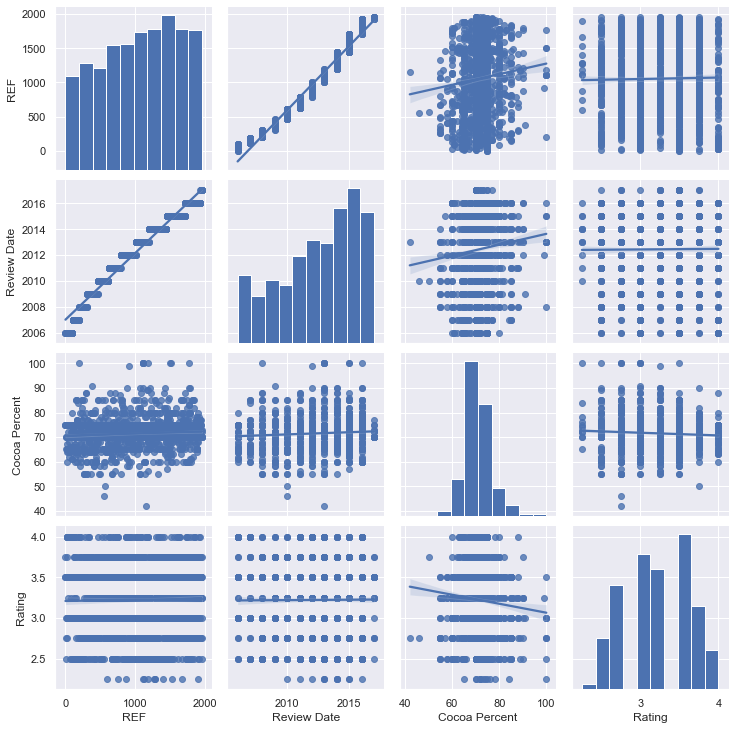

In [37]:
sns.pairplot(cacao, kind = 'reg')

In [38]:
cacao.corr()

,REF,Review Date,Cocoa Percent,Rating
REF,1.000000,0.984913,0.083765,0.016189
Review Date,0.984913,1.000000,0.086523,0.006703
Cocoa Percent,0.083765,0.086523,1.000000,-0.078156
Rating,0.016189,0.006703,-0.078156,1.000000


In [39]:
def get_boxplot(df, column):
    fig, ax = plt.subplots(figsize = (14, 4))
    top10value = df[column].value_counts().index[:10]
    data = df[df[column].isin(top10value)]
    sns.boxplot(x=column, y='Rating', data=data, ax=ax)
    plt.xticks(rotation=45)
    plt.show()

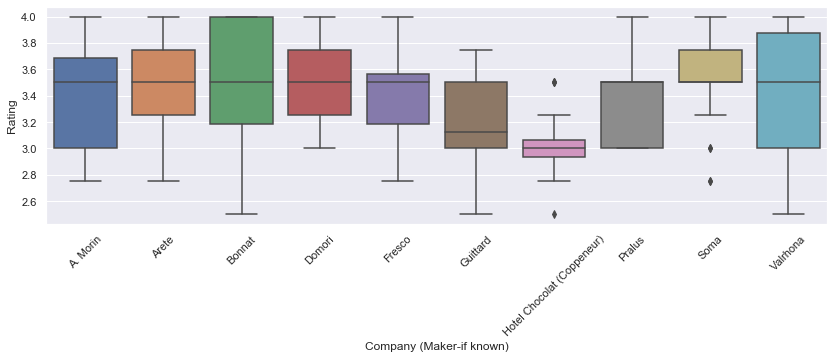

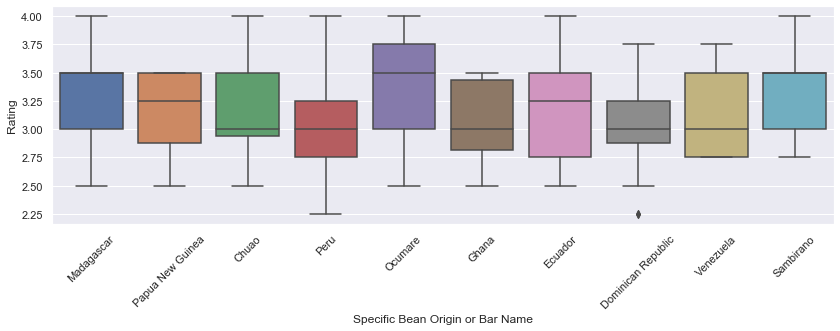

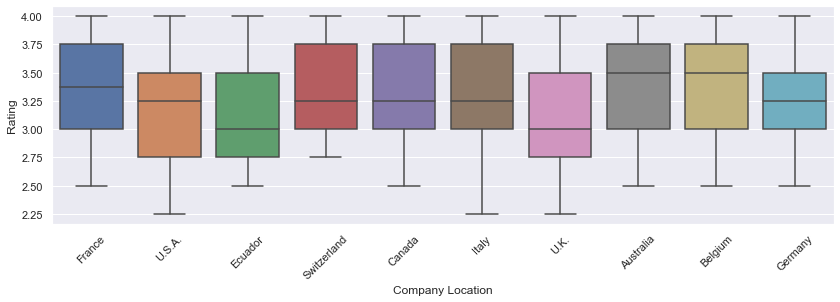

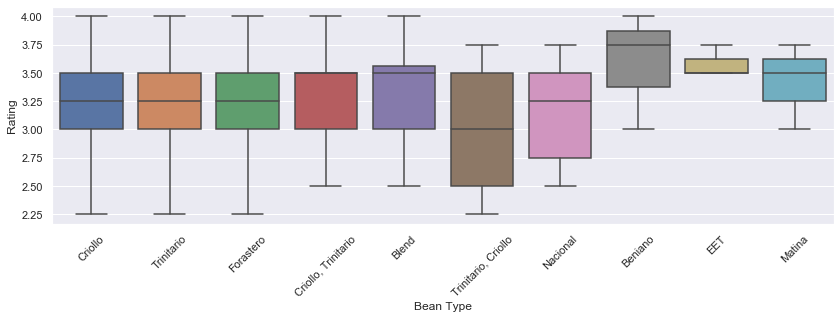

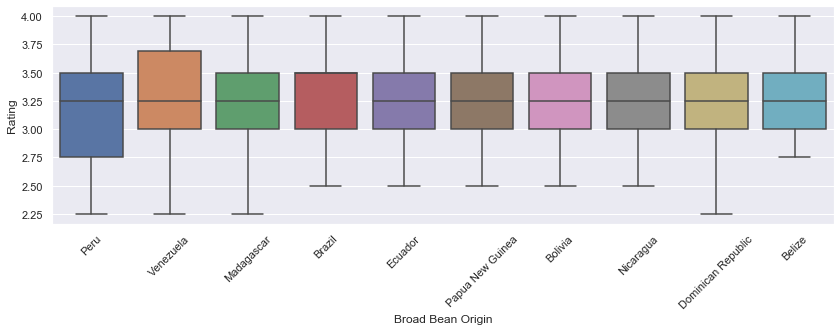

In [40]:
for col in ['Company (Maker-if known)', 'Specific Bean Origin or Bar Name', 'Company Location', 'Bean Type', 'Broad Bean Origin']:
    get_boxplot(cacao, col)

In [41]:
top10values = cacao['Company (Maker-if known)'].value_counts().index[:10]
combinations_all = list(combinations(top10values, 2))

list(combinations_all)

[('Soma', 'Fresco'),
 ('Soma', 'Bonnat'),
 ('Soma', 'Pralus'),
 ('Soma', 'Domori'),
 ('Soma', 'Valrhona'),
 ('Soma', 'Guittard'),
 ('Soma', 'Arete'),
 ('Soma', 'A. Morin'),
 ('Soma', 'Hotel Chocolat (Coppeneur)'),
 ('Fresco', 'Bonnat'),
 ('Fresco', 'Pralus'),
 ('Fresco', 'Domori'),
 ('Fresco', 'Valrhona'),
 ('Fresco', 'Guittard'),
 ('Fresco', 'Arete'),
 ('Fresco', 'A. Morin'),
 ('Fresco', 'Hotel Chocolat (Coppeneur)'),
 ('Bonnat', 'Pralus'),
 ('Bonnat', 'Domori'),
 ('Bonnat', 'Valrhona'),
 ('Bonnat', 'Guittard'),
 ('Bonnat', 'Arete'),
 ('Bonnat', 'A. Morin'),
 ('Bonnat', 'Hotel Chocolat (Coppeneur)'),
 ('Pralus', 'Domori'),
 ('Pralus', 'Valrhona'),
 ('Pralus', 'Guittard'),
 ('Pralus', 'Arete'),
 ('Pralus', 'A. Morin'),
 ('Pralus', 'Hotel Chocolat (Coppeneur)'),
 ('Domori', 'Valrhona'),
 ('Domori', 'Guittard'),
 ('Domori', 'Arete'),
 ('Domori', 'A. Morin'),
 ('Domori', 'Hotel Chocolat (Coppeneur)'),
 ('Valrhona', 'Guittard'),
 ('Valrhona', 'Arete'),
 ('Valrhona', 'A. Morin'),
 ('Valrhon

In [51]:
def get_stat_diff(column_name):
    top10values = cacao[column_name].value_counts().index[:10]
    all_combinations = list(combinations(top10values, 2))

    for pair in all_combinations:
        left = cacao[cacao[column_name] == pair[0]]['Rating']
        right = cacao[cacao[column_name] == pair[1]]['Rating']
        r = ttest_ind(left, right)
        print(r)
        if r.pvalue <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column_name)
            break

In [52]:
for col in ['Company (Maker-if known)', 'Specific Bean Origin or Bar Name', 'Company Location', 'Bean Type', 'Broad Bean Origin']:
    get_stat_diff(col)

Ttest_indResult(statistic=1.965911648346223, pvalue=0.0534547397562873)
Ttest_indResult(statistic=0.534538718517973, pvalue=0.5947383269507562)
Ttest_indResult(statistic=2.121427431575582, pvalue=0.037645320978332786)
Ttest_indResult(statistic=1.0878784981250451, pvalue=0.28066617042900005)
Ttest_indResult(statistic=1.5360866669584592, pvalue=0.129605044838096)
Ttest_indResult(statistic=4.205217432883264, pvalue=8.678818271385775e-05)
Найдены статистически значимые различия для колонки Company (Maker-if known)
Ttest_indResult(statistic=3.5898341726882057, pvalue=0.0005331461171242413)
Найдены статистически значимые различия для колонки Specific Bean Origin or Bar Name
Ttest_indResult(statistic=-3.9713813949113552, pvalue=7.740603861860266e-05)
Найдены статистически значимые различия для колонки Company Location
Ttest_indResult(statistic=1.4283854976604278, pvalue=0.15371734731967984)
Ttest_indResult(statistic=-0.2533250082801552, pvalue=0.8001087338546491)
Ttest_indResult(statistic=-0.